# 課題5 ネットワーク分析

配点
- Q1 4P
- Q2 4P
- Q3 2P

In [81]:
# モジュールのインポート
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

以下では、networkxモジュールに含まれるデータセット、空手クラブのソーシャルネットワーク、からグラフオブジェクトを作成し、ネットワーク全体を可視化しています。ネットワークは無方向で重みなしです。また自己ループやノード間の多重リンクはありません。

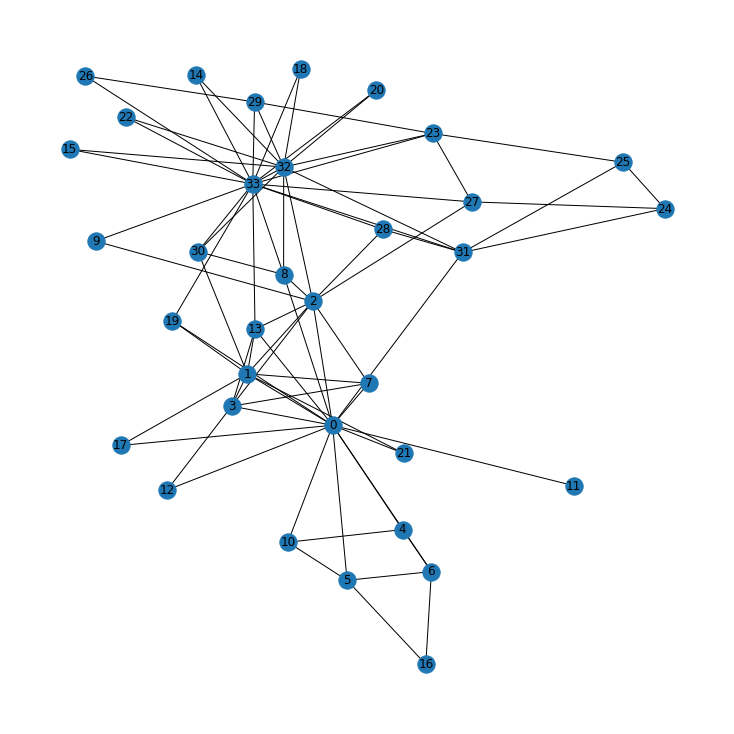

In [82]:
G = nx.karate_club_graph() # グラフの作成
pos = nx.spring_layout(G) # 可視化のレイアウト
plt.figure(figsize=(10,10)) # 可視化のサイズ
nx.draw(G, pos=pos, with_labels=True) # 可視化

このネットワークには34のノードと78のリンクが含まれ、各ノードには0から33の数字がふられています。以下ではこの数字をノードのラベルとして用います。

In [83]:
print(len(G)) # ノード数
print(G.size()) # リンク数

34
78


このネットワークの隣接行列`adj_matrix`は、以下の通りです。

In [84]:
adj_matrix=nx.adjacency_matrix(G).toarray() # 隣接行列の取得
for row in adj_matrix:
    print(row)

[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
[1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
[1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0

## Q1.1
以下の辞書`adj_list`は、上記のネットワークのノードをキー、そのノードに隣接しているノードのリストを値として持つ辞書です。例えば、キーが31の値のリストを見ることで、ノード31には0, 24, 25, 28, 32, 33のノードが隣接していることがわかります。このような各ノードの隣接ノードリストの辞書を隣接リストと呼びます。

```Python
adj_list={0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31],
                1: [0, 2, 3, 7, 13, 17, 19, 21, 30],
                2: [0, 1, 3, 7, 8, 9, 13, 27, 28, 32],
                  ...
                31: [0, 24, 25, 28, 32, 33],
                32: [2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33],
                33: [8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32]}
```

引数`adj_matrix`で隣接行列を受け取り、隣接リストとなる辞書`adj_list`を作成して返す`get_adj_list()`関数を実装してください。

In [85]:
def get_adj_list(adj_matrix):
    adj_list={}
    l=len(adj_matrix)
    for i in range(l):
      adj_list[i]=[]
      for j in range(len(adj_matrix[i])):
        if adj_matrix[i][j]==1:
          adj_list[i].append(j)
    return adj_list

`get_adj_list`関数が完成したら、以下のセルを実行して、`adj_list[0]`や`adj_list[33]`を表示し、上記に示されている各ノードの隣接ノードリストが作成できているか確認してください。

In [86]:
adj_list=get_adj_list(adj_matrix)

print(adj_list[0])
print(adj_list[33])

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]
[8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32]


### Q1.2
授業資料の幅優先探索のアルゴリズムを参考に、第1引数`g`に隣接リスト、第2引数`s`に始点ノードのラベルを受け取り、始点から各ノードへの距離の辞書`d`を返す以下の`bfs`関数を完成させてください。隣接リストは上記で作成した`adj_list`を用います。辞書`d`は、キーがノードのラベル、値が始点からそのノードへの距離となる辞書です。

授業資料中の`Q.enqueue`, `Q.dequeue`はそれぞれコード中の`Q.append`, `Q.popleft`に対応します。

In [48]:
from collections import deque # キューのインポート
def bfs(g, s):
    ### 引数：
    # g: 隣接リスト
    # s: 始点ノードのラベル
    
    Q = deque()# キューの初期化
    visited={} # 訪問済みノード辞書
    d={} # 始点から各ノードへの距離の辞書
    for i in g.keys(): # ネットワークの各ノードiについて
        d[i]=np.inf # 距離の辞書を全て距離無限大に初期化
        visited[i]=False  # 訪問済みノード辞書を全て未訪問（False）に初期化
        
    visited[s]=True  # 始点ノードを訪問済みにする
    d[s]=0  # 始点ノード自身への距離は0
    Q.append(s) # 始点ノードをキューに入れる

    
    while Q: # キューが空でない限り繰り返し
        i = Q.popleft()
        for j in adj_list[i]:
          
          if visited[j]==False:
            visited[j]=True
            d[j]=d[i]+1
            Q.append(j)
        
    return d # 始点から各ノードへの距離の辞書を返す

`bfs`関数が完成したら、以下のセルを実行して動作を確認してください。ノード0からノード26への長さは3、ノード11からノード26への長さは4となります。

In [39]:
d1=bfs(adj_list, 0)
print(d1[26])

d2=bfs(adj_list, 11)
print(d2[26])

{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 2, 10: 1, 11: 1, 12: 1, 13: 1, 14: 3, 15: 3, 16: 2, 17: 1, 18: 3, 19: 1, 20: 3, 21: 1, 22: 3, 23: 3, 24: 2, 25: 2, 26: 3, 27: 2, 28: 2, 29: 3, 30: 2, 31: 1, 32: 2, 33: 2}
3
{0: 1, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 2, 11: 0, 12: 2, 13: 2, 14: 4, 15: 4, 16: 3, 17: 2, 18: 4, 19: 2, 20: 4, 21: 2, 22: 4, 23: 4, 24: 3, 25: 3, 26: 4, 27: 3, 28: 3, 29: 4, 30: 3, 31: 2, 32: 3, 33: 3}
4


## Q2
以下では、空手クラブのソーシャルネットワークデータについて各ノードの次数中心性を計算し、次数中心性の上位のノードを表示しています。ノード33が最も次数中心性が高いことがわかります。

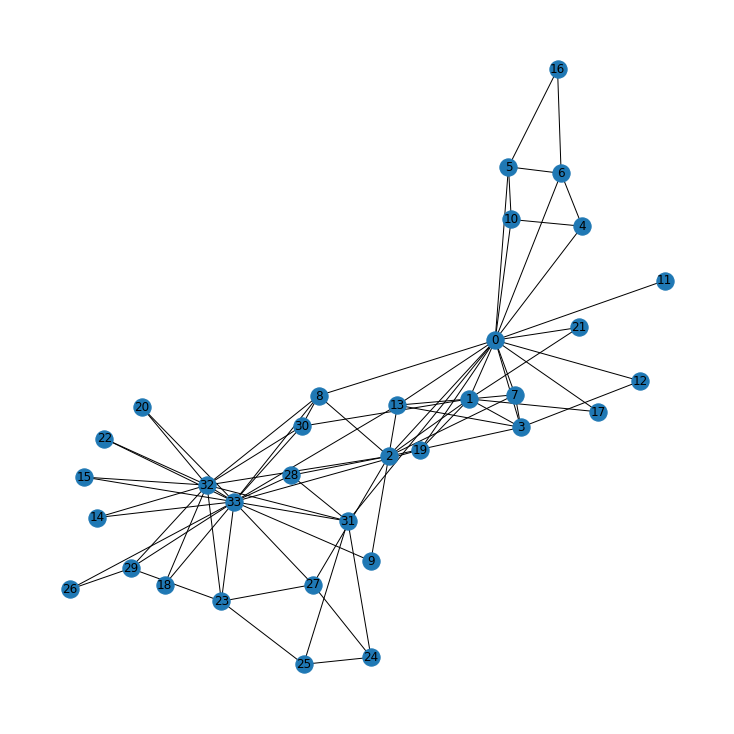

In [49]:
G = nx.karate_club_graph()
plt.figure(figsize=(10,10)) # 可視化のサイズ
nx.draw(G, pos=pos, with_labels=True) # 可視化

In [50]:
# 次数中心性 (次数/最大次数（N-1))
degree=nx.degree_centrality(G)
print(pd.Series(degree).sort_values(ascending=False).head(5)) 

33    0.515152
0     0.484848
32    0.363636
2     0.303030
1     0.272727
dtype: float64


近接中心性、媒介中心性、固有ベクトル中心性の各中心性について、上位のノードは以下の通りです。

ネットワーク図の各ノードの位置を参照しながらそれぞれの中心性で上位のノードがどのような位置にあるか観察してください。

In [51]:
# 近接中心性
print('closeness')
closeness = nx.closeness_centrality(G)
print(pd.Series(closeness).sort_values(ascending=False).head(5))

# 媒介中心性
print('betweenness')
betweenness = nx.betweenness_centrality(G)
print(pd.Series(betweenness).sort_values(ascending=False).head(5))

# 固有ベクトル中心性
print('eigenvector')
eigen = nx.eigenvector_centrality(G)
print(pd.Series(eigen).sort_values(ascending=False).head(5))

closeness
0     0.568966
2     0.559322
33    0.550000
31    0.540984
13    0.515625
dtype: float64
betweenness
0     0.437635
33    0.304075
32    0.145247
2     0.143657
31    0.138276
dtype: float64
eigenvector
33    0.373371
0     0.355483
2     0.317189
32    0.308651
1     0.265954
dtype: float64


以下では各ノードのPageRankを計算する関数を実装します。`pagerank_centrality`関数は、第1引数`adj_matrix`に隣接行列、第2引数`alpha`にダンピング係数（通常移動とテレポート移動の割合を指定）、第3引数`t`にベキ乗法の繰り返し回数を受け取り、各ノードのPageRankを要素とするベクトルを返します。ベクトルの各要素のインデックスはノードのラベルに対応します。

PageRankを更新するための行列$B$はダンピング係数を$\alpha$、推移確率行列を$A$として以下のように定義されます。行列$A$はネットワークの隣接行列について、すべての要素が0の列があればその列のすべての要素を1とした上で、隣接行列の各要素についてその列の和で割ったものです。

$B=\alpha A+\frac{1-\alpha}{ノード数}$

行列$B$を用いてPageRankのベクトル$x=(x_1,x_2,...,x_n)$は以下のように更新されます。

$x=Bx$

なお、PageRankでは冗長な処理ですが、ベキ乗法の手続きでは$x$の更新ごとに正規化処理を行います。

$x=x/\Sigma_{i=1}^n x_i$ 

In [117]:
def pagerank_centrality(adj_matrix, alpha=0.85, t=100):
    # すべての要素が0の列があればその列のすべての要素を1とする
    adj_matrix[:, adj_matrix.sum(0)==0]=1
    A = adj_matrix
    row=len(A)
    col=len(A[0])
    res=[]
    for i in range(col):
      sum=np.sum(A[:,i])
      colum=A[:,i]/sum
      res.append(colum)
    res=np.array(res)
    res=res.T
    A=res
    B = alpha*A+(1-alpha)/row
    x = np.ones((row,1))/row
    for i in range(t+1):
      x=np.matmul(B,x)
      x=x/(np.sum(x))
    x=x.reshape((col,))
    return x

`pagerank_centrality`関数が完成したら、以下のセルを実行して動作を確認してください。最もPageRankが高いノードは33でそのPageRankは$\simeq0.10$、次にPageRankが高いノードは0でそのPageRankは$\simeq0.09$となります。

In [118]:
adj_matrix=nx.adjacency_matrix(G).toarray()
pagerank=pagerank_centrality(adj_matrix, 0.85, 100)
# print(pagerank)
print(pd.Series(pagerank).sort_values(ascending=False).head(5))

33    0.100919
0     0.096997
32    0.071693
2     0.057079
1     0.052877
dtype: float64


NetworkXの`nx.pagerank`関数を使って各ノードのPageRankを計算すると以下のようになります。

In [119]:
pr=nx.pagerank(G, alpha=0.85, max_iter=100)
print(pd.Series(pr).sort_values(ascending=False).head(5))

33    0.100918
0     0.097002
32    0.071692
2     0.057078
1     0.052878
dtype: float64


## Q3
以下では、空手クラブのソーシャルネットワークデータを用いてコミュニティ抽出を行います。まず、コミュニティ抽出前のネットワークを可視化します。

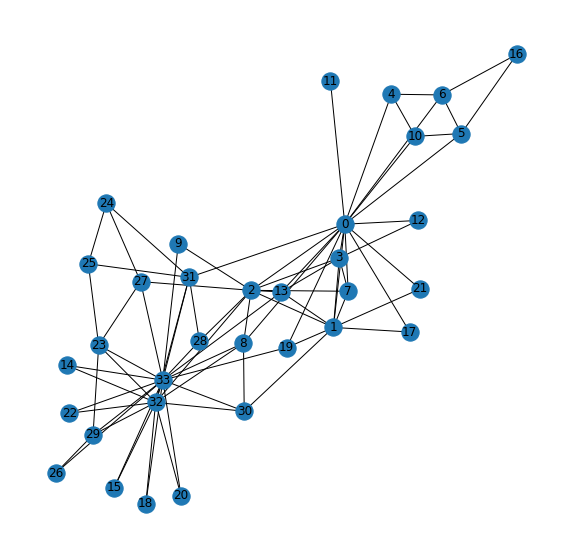

In [ ]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos)
_ = plt.axis('off')

エッジ媒介中心性を用いたコミュニティ抽出（Girvan-Newman法）を行う以下の`girvan_newman`関数を完成させてください。`girvan_newman`関数は引数としてnetworkxのグラフオブジェクトを受け取り、各コミュニティのノード集合を要素としたリストを返します。

In [121]:
def girvan_newman(G):
    G = G.copy() # グラフGのエッジを除いていくのでグラフオブジェクトをコピーしておく
    removed_edges=[] # 取り除いたエッジのリスト
    
    while nx.number_connected_components(G) ==1: # グラフが分割されるまで繰り返す
      # エッジ媒介中心性が一番大きいエッジをGから取り除く
      # 取り除いたエッジの両端ノードのIDのペアをタプルとしてremoved_edgesに追加
      a=find_best_edge(G)
      G.remove_edge(*a)
      removed_edges.append(a)
    
    return list(nx.connected_components(G)), removed_edges

def find_best_edge(G): # グラフGにおいてエッジ媒介中心性が一番大きいエッジの両端ノードをタプルとして返す関数
    edge_between = nx.edge_betweenness_centrality(G)     
    return max(edge_between, key=edge_between.get)

`girvan_newman`関数が完成したら、以下のセルを実行して動作を確認してください。取り除かれるエッジのリスト`removed_edges`は以下になります。

```Python
 [(0, 31), (0, 2), (0, 8), (13, 33), (19, 33), (2, 32), (1, 30), (1, 2), (2, 3), (2, 7), (2, 13)]
 ```

In [122]:
communities, removed_edges = girvan_newman(G)
print(removed_edges)

[(0, 31), (0, 2), (0, 8), (13, 33), (19, 33), (2, 32), (1, 30), (1, 2), (2, 3), (2, 7), (2, 13)]


以下のセルを実行してネットワークを可視化し、先の処理で抽出されたコミュニティを確認してください。取り除かれたエッジは破線で示されています。

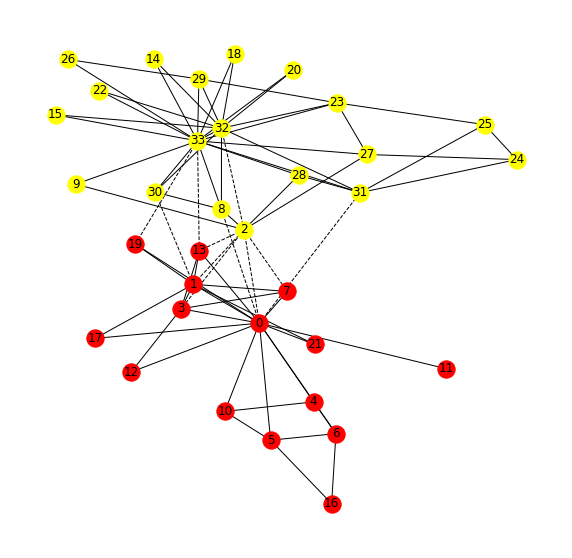

In [123]:
keeped_edges = set(G.edges()) - set(removed_edges)
colors = ['red', 'yellow']

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(G, pos, edgelist=keeped_edges)
nx.draw_networkx_edges(G, pos, edgelist=removed_edges, style='dashed')
for community, color in zip(communities, colors):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=community, node_color=color)
nx.draw_networkx_labels(G, pos=pos)
_ = plt.axis('off')

### 参考

In [ ]:
# networkx(バージョン2.X以上)のGirvan–Newman法の関数によるコミュニティ抽出
community_generator = nx.community.girvan_newman(G)

# community_generatorはジェネレーターとなっており、for文を繰り返すごとにコミュニティ分割を行う
# 最終的には各ノードが1つのコミュニティの状態となる
for communities in community_generator: 
    print(communities)

## コードのテスト
以下の実行ボタンを押してから、設問ごとにCheck関数でコードのテストをしてください。

In [110]:
## コードのテストの前にこのセルを実行してください
!pip install prog_edu_assistant_tools
import re
import sys
import jinja2
from IPython.core import display
from google.colab import _message as google_message
from prog_edu_assistant_tools.magics import report, autotest, CaptureOutput
from prog_edu_assistant_tools.check import Check

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Q1.1

In [87]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q1_1')

## Q1.2

In [78]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q1_2')

## Q2

In [120]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q2')

## Q3

In [124]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q3')